In [8]:
# import json

# with open('all_qguide_data.html', 'r') as file:
#     json_data = json.load(file)

# with open('all_qguide_data.json', 'w') as file:
#     json.dump(json_data, file, separators=(',', ':'))


In [9]:
# from bs4 import BeautifulSoup
# import pandas as pd
# import requests
# from tabulate import tabulate

# def extract_table_data(url):
#     # Fetch the HTML content from the URL
#     response = requests.get(url)
#     html = response.text

#     # Parse the HTML
#     soup = BeautifulSoup(html, 'html.parser')

#     # Define table names
#     table_names = ['Responses', 'General', 'Instructor', 'Hours', 'Recommendation', 'Recommendation_stats', 'Reasons', 'Comments']

#     # Find all tables containing the required data
#     tables = soup.find_all('table')

#     # Create a dictionary to store DataFrames for each table
#     dataframes = {}

#     # Iterate through each table
#     for idx, table in enumerate(tables):
#         # Extract headers
#         headers = []
#         for th in table.find('tr').find_all('th'):
#             headers.append(th.text.strip())

#         # Extract data rows
#         data = []
#         for row in table.find_all('tr'):
#             row_data = [cell.text.strip() for cell in row.find_all(['td', 'th'])]
#             if len(row_data) == len(headers):
#                 data.append(row_data)

#         # If data rows exist
#         if len(data) > 1:
#             # Create a DataFrame excluding the header row
#             df = pd.DataFrame(data[1:], columns=headers)
#             dataframes[table_names[idx]] = df

#     return dataframes


In [10]:
# # Example usage:
# url = "https://harvard.bluera.com/harvard/rpv-eng.aspx?lang=eng&redi=1&SelectedIDforPrint=7a0a2af3e410e112bf9de805337d95874c27341b5445e2f5053d952af958c58c9549a839ccebc274f7760f73d58e1223&ReportType=2&regl=en-US"
# tables_data = extract_table_data(url)

# # Print each table with its name
# for table_name, table_df in tables_data.items():
#     print(f"Table '{table_name}':")
#     print(tabulate(table_df, headers='keys', tablefmt='grid'))
#     print()

In [11]:
# import json
# import time

# with open('all_qguide_data.json', 'r') as f:
#     all_qguide_data = json.load(f)

# course_data_list = []

# start_time = time.time()

# total_entries = len(all_qguide_data['data'])

# processed_entries = 0

# for entry in all_qguide_data['data']:
#     iteration_start_time = time.time()

#     course_data = {}
#     for key in ['title', 'url', 'instructor', 'department', 'term', 'subject', 'blueCourseId']:
#         course_data[key.capitalize()] = entry[key]

#     tables_data = extract_table_data(entry['url'])

#     tables_data_dict = {table_name: table_df.to_dict(orient='records') for table_name, table_df in tables_data.items()}

#     course_data['Feedback'] = tables_data_dict

#     course_data_list.append(course_data)

#     processed_entries += 1

#     iteration_elapsed_time = time.time() - iteration_start_time

#     percent_finished = (processed_entries / total_entries) * 100

#     avg_time_per_iteration = (time.time() - start_time) / processed_entries

#     remaining_entries = total_entries - processed_entries
#     remaining_time_seconds = remaining_entries * avg_time_per_iteration

#     hours = int(remaining_time_seconds // 3600)
#     remaining_time_seconds %= 3600
#     minutes = int(remaining_time_seconds // 60)
#     seconds = int(remaining_time_seconds % 60)

#     print(f"Iteration {processed_entries}/{total_entries} - {percent_finished:.2f}% completed - Time taken: {iteration_elapsed_time:.2f}s - Estimated time remaining: {hours}h {minutes}m {seconds}s")

# end_time = time.time()

# with open('course_data.json', 'w') as json_file:
#     json.dump(course_data_list, json_file, indent=4)


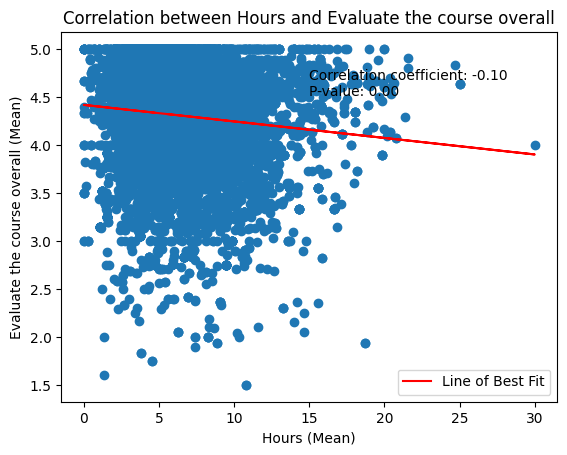

In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the JSON data
with open('course_data.json', 'r') as file:
    data = json.load(file)

# Initialize lists to store hours and overall evaluation ratings
hours = []
course_scores = []

# Iterate through each entry in the data
for entry in data:
    # Check if the entry has a 'Feedback' dictionary with 'Hours' and 'General' keys
    if 'Feedback' in entry and 'Hours' in entry['Feedback'] and 'General' in entry['Feedback']:
        # Extract hours and overall evaluation rating
        hours_data = entry['Feedback']['Hours']
        overall_data = entry['Feedback']['General'][0]

        # Check if hours_data has at least three elements and the third element is a dictionary with a 'Value' key
        if len(hours_data) > 2 and isinstance(hours_data[2], dict) and 'Value' in hours_data[2]:
            # Convert hours value to float and append to the list
            hours.append(float(hours_data[2]['Value']))
        else:
            # Handle missing or invalid hours data
            hours.append(np.nan)

        # Convert overall evaluation rating to float and append to the list
        course_scores.append(float(overall_data['Course Mean']))
    else:
        # Handle missing 'Feedback', 'Hours', or 'General' keys
        hours.append(np.nan)
        course_scores.append(np.nan)

# Convert lists to numpy arrays for correlation calculation
hours_array = np.array(hours)
course_scores_array = np.array(course_scores)

# Remove NaN values from the arrays
valid_indices = ~np.isnan(hours_array) & ~np.isnan(course_scores_array)
hours_array = hours_array[valid_indices]
course_scores_array = course_scores_array[valid_indices]

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(hours_array, course_scores_array)

# Fit a linear regression line
slope, intercept = np.polyfit(hours_array, course_scores_array, 1)
line_of_best_fit = slope * hours_array + intercept

# Plot the data
plt.scatter(hours_array, course_scores_array)
plt.plot(hours_array, line_of_best_fit, color='red', label='Line of Best Fit')
plt.xlabel('Hours (Mean)')
plt.ylabel('Evaluate the course overall (Mean)')
plt.title('Correlation between Hours and Evaluate the course overall')
plt.text(0.5, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}\nP-value: {p_value:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.show()

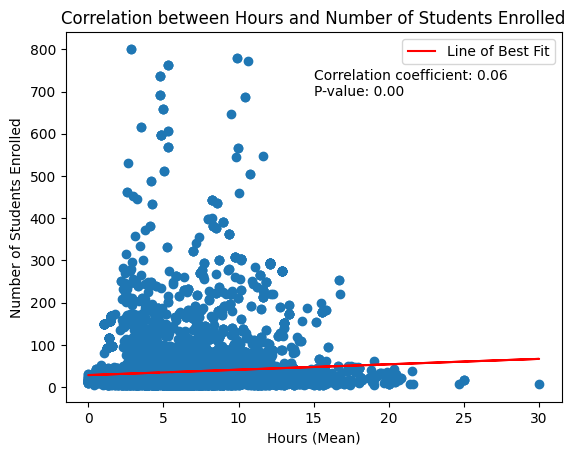

In [13]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the JSON data
with open('course_data.json', 'r') as file:
    data = json.load(file)

# Initialize lists to store hours and overall evaluation ratings
hours = []
course_scores = []

# Iterate through each entry in the data
for entry in data:
    # Check if the entry has a 'Feedback' dictionary with 'Hours' and 'Responses' keys
    if 'Feedback' in entry and 'Hours' in entry['Feedback'] and 'Responses' in entry['Feedback']:
        # Extract hours and overall evaluation rating
        hours_data = entry['Feedback']['Hours']
        responses = entry['Feedback']['Responses']

        # Check if 'Responses' list has at least two elements
        if len(responses) > 1:
            # Check if hours_data has at least three elements and the third element is a dictionary with a 'Value' key
            if len(hours_data) > 2 and isinstance(hours_data[2], dict) and 'Value' in hours_data[2]:
                # Convert hours value to float and append to the list
                hours.append(float(hours_data[2]['Value']))

                # Convert overall evaluation rating to float and append to the list
                course_scores.append(float(responses[1]['Students']))
            else:
                # Handle missing or invalid hours data
                hours.append(np.nan)
                course_scores.append(np.nan)
        else:
            # Handle missing or invalid 'Responses' data
            hours.append(np.nan)
            course_scores.append(np.nan)
    else:
        # Handle missing 'Feedback', 'Hours', or 'Responses' keys
        hours.append(np.nan)
        course_scores.append(np.nan)

# Convert lists to numpy arrays for correlation calculation
hours_array = np.array(hours)
course_scores_array = np.array(course_scores)

# Remove NaN values from the arrays
valid_indices = ~np.isnan(hours_array) & ~np.isnan(course_scores_array)
hours_array = hours_array[valid_indices]
course_scores_array = course_scores_array[valid_indices]

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(hours_array, course_scores_array)

# Fit a linear regression line
slope, intercept = np.polyfit(hours_array, course_scores_array, 1)
line_of_best_fit = slope * hours_array + intercept

# Plot the data
plt.scatter(hours_array, course_scores_array)
plt.plot(hours_array, line_of_best_fit, color='red', label='Line of Best Fit')
plt.xlabel('Hours (Mean)')
plt.ylabel('Number of Students Enrolled')
plt.title('Correlation between Hours and Number of Students Enrolled')
plt.text(0.5, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}\nP-value: {p_value:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.show()